In [2]:
import glob
import pandas as pd
import numpy as np
import datetime as dt
import tqdm

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file = glob.glob(r"C:\Users\jagdi\OneDrive\Desktop\DATA\data1\*.csv")
file

['C:\\Users\\jagdi\\OneDrive\\Desktop\\DATA\\data1\\202001-citibike-tripdata.csv',
 'C:\\Users\\jagdi\\OneDrive\\Desktop\\DATA\\data1\\202002-citibike-tripdata.csv',
 'C:\\Users\\jagdi\\OneDrive\\Desktop\\DATA\\data1\\202003-citibike-tripdata.csv',
 'C:\\Users\\jagdi\\OneDrive\\Desktop\\DATA\\data1\\202004-citibike-tripdata.csv',
 'C:\\Users\\jagdi\\OneDrive\\Desktop\\DATA\\data1\\202005-citibike-tripdata.csv',
 'C:\\Users\\jagdi\\OneDrive\\Desktop\\DATA\\data1\\202006-citibike-tripdata.csv',
 'C:\\Users\\jagdi\\OneDrive\\Desktop\\DATA\\data1\\202007-citibike-tripdata.csv',
 'C:\\Users\\jagdi\\OneDrive\\Desktop\\DATA\\data1\\202008-citibike-tripdata.csv',
 'C:\\Users\\jagdi\\OneDrive\\Desktop\\DATA\\data1\\202009-citibike-tripdata.csv',
 'C:\\Users\\jagdi\\OneDrive\\Desktop\\DATA\\data1\\202010-citibike-tripdata.csv',
 'C:\\Users\\jagdi\\OneDrive\\Desktop\\DATA\\data1\\202011-citibike-tripdata.csv',
 'C:\\Users\\jagdi\\OneDrive\\Desktop\\DATA\\data1\\202012-citibike-tripdata.csv',
 'C:

In [5]:
df=pd.DataFrame()
errorfile=[]

In [6]:
for x in tqdm.tqdm(file):
    try:
        r=pd.read_csv(x,low_memory=False)
        r["starttime"] = pd.to_datetime(r["starttime"])
        r["starttime"] =r["starttime"].dt.date
        r["tripduration"] = (r["tripduration"])/60
        r = r.groupby(["start station id","starttime"]).agg({"tripduration":["count","sum","mean"]})
        r = r.reset_index(drop=False)
        r.columns = ["station_id","date","total_count","total_duration","mean_duration"]
        df=pd.concat([df,r],axis=0)
    except:
        errorfile.append(x)
        
        

100%|██████████| 13/13 [01:17<00:00,  5.98s/it]


In [7]:
df.head()

,station_id,date,total_count,total_duration,mean_duration
0,72,2020-01-01,39,676.200000,17.338462
1,72,2020-01-02,96,1204.533333,12.547222
2,72,2020-01-03,74,1099.400000,14.856757
3,72,2020-01-04,51,836.983333,16.411438
4,72,2020-01-05,51,907.333333,17.790850


In [7]:
df.head()

,station_id,date,total_count,total_duration,mean_duration
0,72,2020-01-01,39,40572,1040.307692
1,72,2020-01-02,96,72272,752.833333
2,72,2020-01-03,74,65964,891.405405
3,72,2020-01-04,51,50219,984.686275
4,72,2020-01-05,51,54440,1067.450980


In [8]:
df.tail()

,station_id,date,total_count,total_duration,mean_duration
35282,4387,2021-01-25,4,5754,1438.500000
35283,4387,2021-01-26,2,2393,1196.500000
35284,4387,2021-01-27,6,10038,1673.000000
35285,4387,2021-01-28,3,3427,1142.333333
35286,4387,2021-01-30,2,5577,2788.500000


In [9]:
df["date"] = pd.to_datetime(df["date"])

In [10]:
df.station_id = df.station_id.astype("object")

In [11]:
df.station_id.dtype

dtype('O')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388699 entries, 0 to 35286
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   station_id      388699 non-null  object        
 1   date            388699 non-null  datetime64[ns]
 2   total_count     388699 non-null  int64         
 3   total_duration  388699 non-null  int64         
 4   mean_duration   388699 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 17.8+ MB


In [13]:
df.nunique()

station_id          1263
date                 397
total_count          600
total_duration    147414
mean_duration     274805
dtype: int64

In [14]:
df.head()

,station_id,date,total_count,total_duration,mean_duration
0,72,2020-01-01,39,40572,1040.307692
1,72,2020-01-02,96,72272,752.833333
2,72,2020-01-03,74,65964,891.405405
3,72,2020-01-04,51,50219,984.686275
4,72,2020-01-05,51,54440,1067.450980


In [15]:
dupli = dict(df.pivot_table(index = ["station_id"], aggfunc ='size'))
dupli

{72: 349,
 79: 396,
 82: 396,
 83: 396,
 116: 362,
 119: 362,
 120: 390,
 127: 394,
 128: 394,
 143: 396,
 144: 395,
 146: 393,
 150: 397,
 151: 397,
 152: 102,
 157: 396,
 161: 374,
 164: 394,
 167: 248,
 168: 316,
 173: 394,
 174: 397,
 195: 241,
 212: 396,
 216: 396,
 217: 395,
 223: 396,
 224: 385,
 228: 396,
 229: 395,
 232: 51,
 236: 386,
 237: 364,
 238: 396,
 239: 396,
 241: 396,
 242: 396,
 243: 21,
 244: 395,
 245: 396,
 247: 396,
 248: 396,
 249: 395,
 250: 394,
 251: 396,
 252: 396,
 254: 397,
 257: 396,
 258: 396,
 259: 396,
 260: 395,
 261: 394,
 262: 396,
 264: 392,
 265: 395,
 266: 13,
 267: 382,
 268: 396,
 270: 396,
 274: 396,
 275: 396,
 276: 396,
 278: 396,
 279: 24,
 280: 294,
 281: 357,
 282: 396,
 284: 397,
 285: 396,
 289: 393,
 291: 396,
 293: 395,
 295: 394,
 296: 9,
 297: 395,
 298: 396,
 301: 396,
 302: 397,
 303: 396,
 304: 387,
 305: 395,
 307: 397,
 308: 396,
 309: 396,
 310: 397,
 311: 397,
 312: 397,
 313: 392,
 315: 396,
 316: 391,
 317: 370,
 319: 396

In [16]:
dupli2 = dict(df.pivot_table(index = ["total_count"], aggfunc ='size'))
dupli2

{1: 8191,
 2: 8838,
 3: 8949,
 4: 8892,
 5: 8891,
 6: 8562,
 7: 8270,
 8: 8150,
 9: 7756,
 10: 7522,
 11: 7221,
 12: 7180,
 13: 6679,
 14: 6402,
 15: 6217,
 16: 5998,
 17: 5845,
 18: 5649,
 19: 5435,
 20: 5234,
 21: 5258,
 22: 4985,
 23: 4887,
 24: 4816,
 25: 4580,
 26: 4640,
 27: 4320,
 28: 4267,
 29: 4111,
 30: 4100,
 31: 3835,
 32: 3839,
 33: 3703,
 34: 3634,
 35: 3484,
 36: 3497,
 37: 3385,
 38: 3265,
 39: 3168,
 40: 3038,
 41: 3063,
 42: 3045,
 43: 2962,
 44: 2697,
 45: 2698,
 46: 2705,
 47: 2676,
 48: 2434,
 49: 2415,
 50: 2415,
 51: 2419,
 52: 2324,
 53: 2274,
 54: 2186,
 55: 2028,
 56: 2008,
 57: 2011,
 58: 2049,
 59: 1944,
 60: 1924,
 61: 1914,
 62: 1840,
 63: 1747,
 64: 1730,
 65: 1707,
 66: 1677,
 67: 1691,
 68: 1576,
 69: 1495,
 70: 1520,
 71: 1503,
 72: 1415,
 73: 1456,
 74: 1408,
 75: 1383,
 76: 1367,
 77: 1397,
 78: 1269,
 79: 1258,
 80: 1178,
 81: 1216,
 82: 1190,
 83: 1104,
 84: 1177,
 85: 1164,
 86: 1119,
 87: 1106,
 88: 1045,
 89: 1085,
 90: 1051,
 91: 1034,
 92: 104

In [17]:
df.isnull().sum()

station_id        0
date              0
total_count       0
total_duration    0
mean_duration     0
dtype: int64

In [18]:
df.describe()

,total_count,total_duration,mean_duration
count,388699.000000,3.886990e+05,3.886990e+05
mean,53.002974,6.841545e+04,1.428313e+03
std,61.129920,1.337643e+05,6.048462e+03
min,1.000000,6.100000e+01,6.100000e+01
25%,12.000000,1.212000e+04,7.747778e+02
50%,31.000000,3.279200e+04,9.986207e+02
75%,70.000000,7.811600e+04,1.292536e+03
max,805.000000,6.263290e+06,1.176381e+06


## Baseline model is that the minimum no. of bike required at any station_id at any day is 54 bikes

In [19]:
df.loc[df['total_count'] == 805]

,station_id,date,total_count,total_duration,mean_duration
7260,514,2020-05-16,805,1378629,1712.582609


In [20]:
df.loc[df['station_id'] == 514]

,station_id,date,total_count,total_duration,mean_duration
7364,514,2020-01-01,49,63018,1286.081633
7365,514,2020-01-02,172,205956,1197.418605
7366,514,2020-01-03,86,89957,1046.011628
7367,514,2020-01-04,75,92067,1227.560000
7368,514,2020-01-05,66,68660,1040.303030
...,...,...,...,...,...
7225,514,2021-01-27,91,102233,1123.439560
7226,514,2021-01-28,62,59490,959.516129
7227,514,2021-01-29,36,33593,933.138889
7228,514,2021-01-30,70,84832,1211.885714


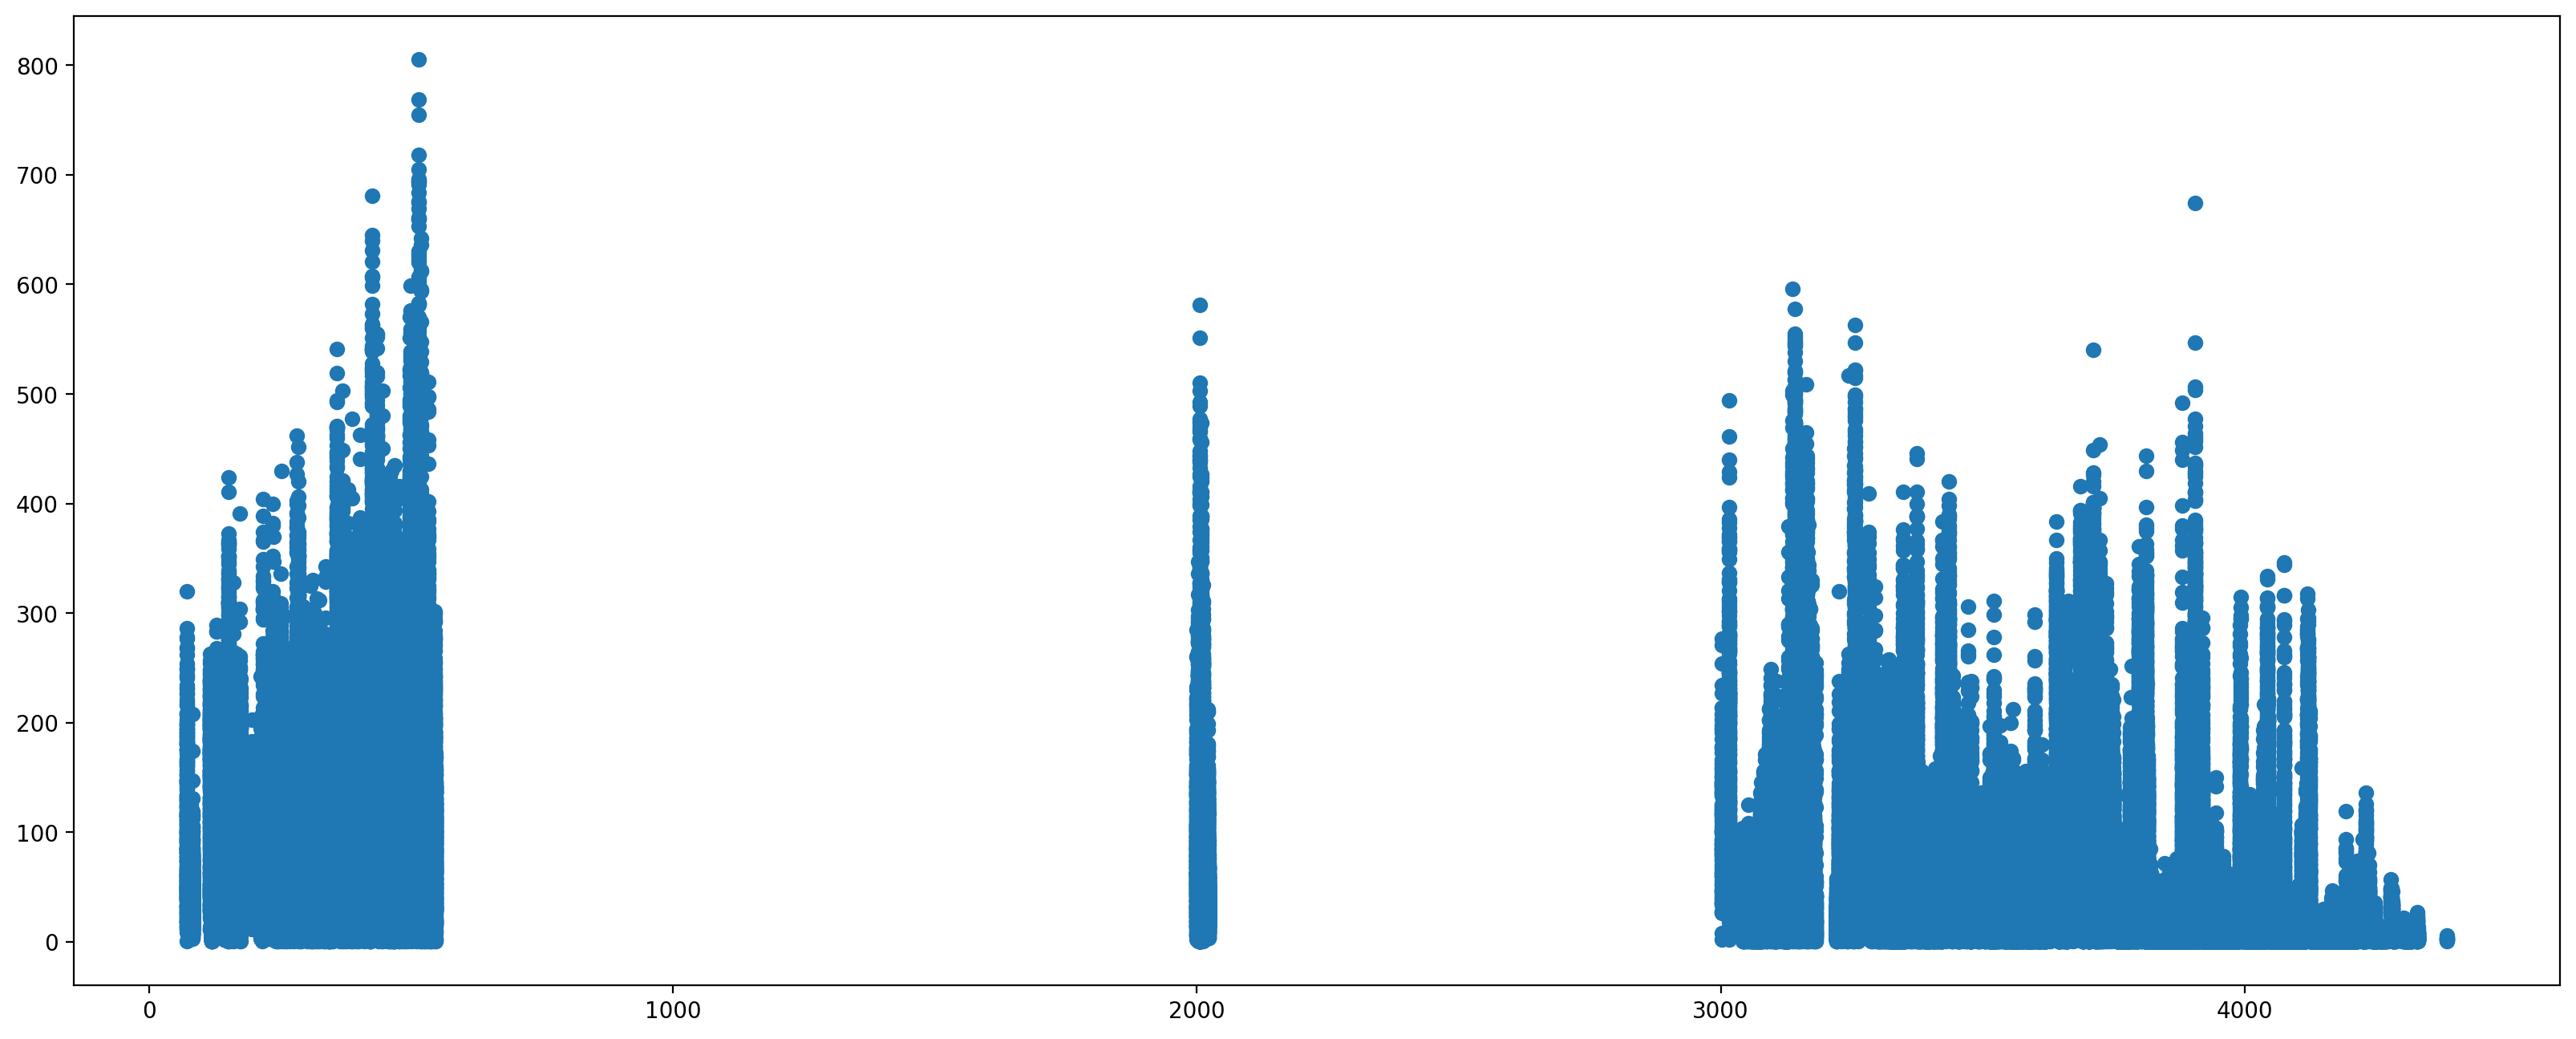

In [21]:
fig = plt.figure(figsize = (20, 8),dpi=200)
plt.scatter(df['station_id'], df['total_count'])
plt.show()

## we can say that station_id from 72 to 600 has a positive corelation with No. of rides per day and from station_id 3000 to 4387 there is a negative corelation with No. of rides per day

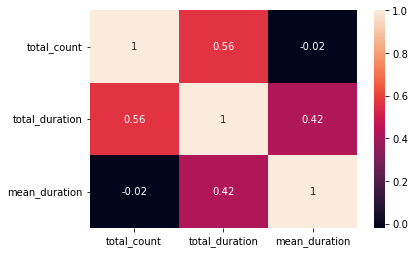

In [22]:
corelation = df.corr(method='pearson')
sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)
plt.show()

## we can say that "total_count" has a negative correlation of -0.42 collectively with station_id because the population of station_id from 3000 to 4387 which had negative corelation was more in comparision to 72 to 600

In [23]:
(df["date"]).nunique()

397

In [24]:
(df["date"]).min()

Timestamp('2020-01-01 00:00:00')

In [25]:
(df["date"]).max()

Timestamp('2021-01-31 00:00:00')

In [26]:
df.head()

,station_id,date,total_count,total_duration,mean_duration
0,72,2020-01-01,39,40572,1040.307692
1,72,2020-01-02,96,72272,752.833333
2,72,2020-01-03,74,65964,891.405405
3,72,2020-01-04,51,50219,984.686275
4,72,2020-01-05,51,54440,1067.450980


In [27]:
df.tail()

,station_id,date,total_count,total_duration,mean_duration
35282,4387,2021-01-25,4,5754,1438.500000
35283,4387,2021-01-26,2,2393,1196.500000
35284,4387,2021-01-27,6,10038,1673.000000
35285,4387,2021-01-28,3,3427,1142.333333
35286,4387,2021-01-30,2,5577,2788.500000


In [28]:
(df["total_count"]).mode()

0    3
Name: total_count, dtype: int64

In [29]:
df.total_count.nunique()

600

In [30]:
df.loc[df['total_count'] == 3]

,station_id,date,total_count,total_duration,mean_duration
1495,260,2020-01-19,3,4442,1480.666667
3672,358,2020-01-20,3,1397,465.666667
5590,443,2020-01-18,3,1028,342.666667
8171,2005,2020-01-06,3,2556,852.000000
8173,2005,2020-01-08,3,1981,660.333333
...,...,...,...,...,...
35193,4328,2021-01-17,3,1815,605.000000
35205,4328,2021-01-29,3,1999,666.333333
35249,4332,2021-01-01,3,3705,1235.000000
35277,4332,2021-01-30,3,4503,1501.000000


In [31]:
df.shape

(388699, 5)

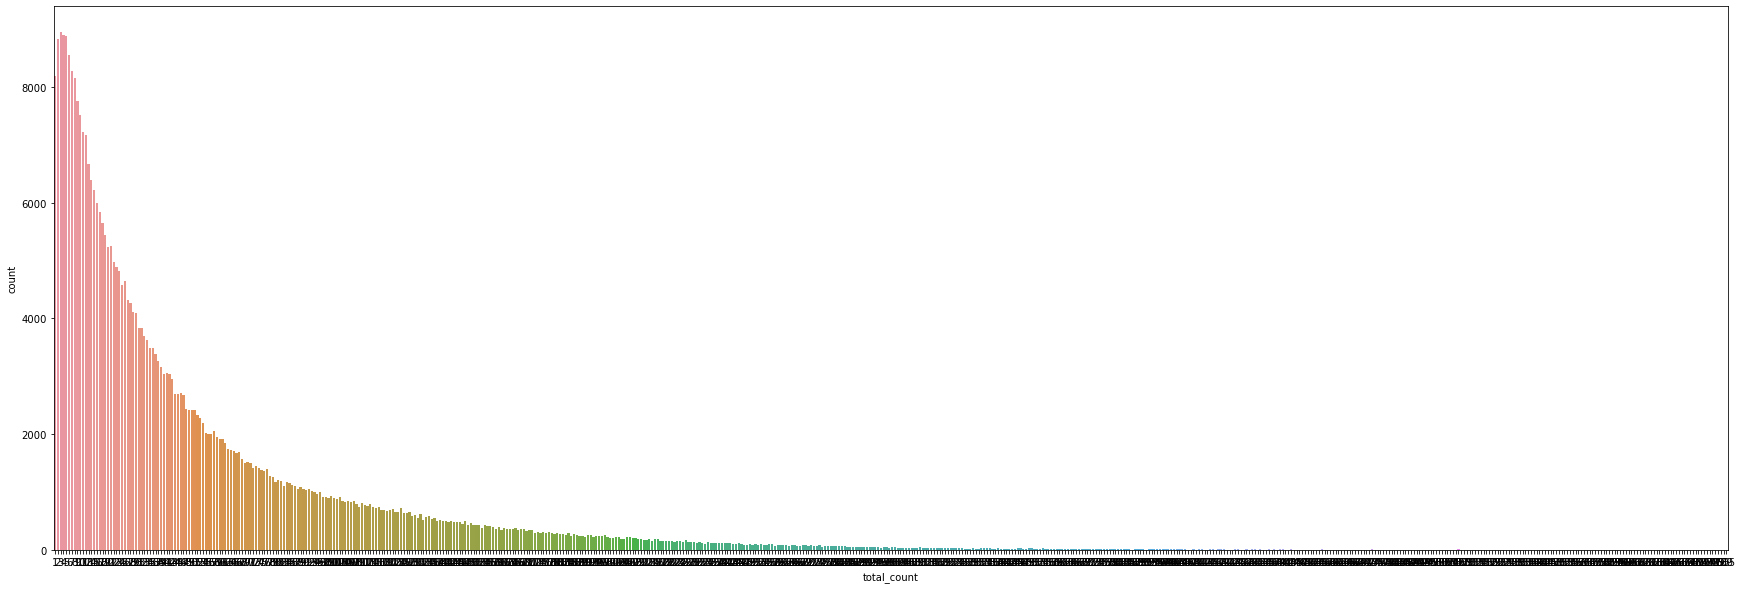

In [32]:
fig = plt.figure(figsize = (30,10))
sns.countplot(x=df["total_count"],data=df)
plt.show()


## As the mode values show that majority no. of rides per day for 397 days was 3 rides per day per station for 8949 time of total data i.e 388699 
## we can see the pattern in the graph that count of rides per day is denser when its close to 1 and slowly decreases as it goes awy from 1

In [33]:
df.station_id.nunique()

1263

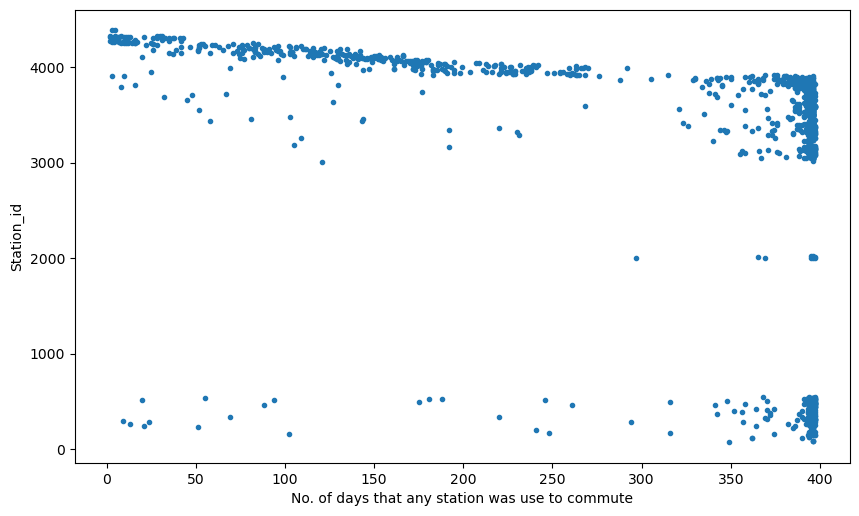

In [34]:
fig = plt.figure(figsize = (10,6),dpi=100)
plt.scatter(df.station_id.value_counts(),df.station_id.value_counts().index,marker=".")
plt.xlabel("No. of days that any station was use to commute")
plt.ylabel("Station_id")
plt.show()

### we can see the commute from station_id above 4000 is less comparision to the station_id ranging from 3000 to 4000 and even station_id between 72 and 650
### Station_id above 4000 has mininum of 2 days of commute to max around 250 days of commute in a span of 397 days
### But Station_id between 75 to 650 and 3000 to 4000 has a minimum commute of 350 days and maximum of 397 days of commute in a span of 397 days i.e bike was use for each and every day from that station_id
## we can conclude from this graph is that the citibike are mostly used at station_id ranging from 3000 to 4000 then secondly between 72 to 650 for almost everyday commute

In [35]:
df.loc[df["date"]=="2020-01-01" ]

,station_id,date,total_count,total_duration,mean_duration
0,72,2020-01-01,39,40572,1040.307692
31,79,2020-01-01,15,9159,610.600000
62,82,2020-01-01,16,10667,666.687500
93,83,2020-01-01,16,15448,965.500000
124,116,2020-01-01,70,37732,539.028571
...,...,...,...,...,...
26579,3902,2020-01-01,2,581,290.500000
26592,3903,2020-01-01,3,2328,776.000000
26666,3908,2020-01-01,32,36582,1143.187500
26701,3910,2020-01-01,3,1373,457.666667


In [36]:
df.loc[df["date"]=="2021-01-31" ]

,station_id,date,total_count,total_duration,mean_duration
30,72,2021-01-31,22,20890,949.545455
61,79,2021-01-31,18,9268,514.888889
92,82,2021-01-31,18,12207,678.166667
123,83,2021-01-31,28,18389,656.750000
154,116,2021-01-31,43,32171,748.162791
...,...,...,...,...,...
35207,4328,2021-01-31,1,262,262.000000
35235,4329,2021-01-31,22,13521,614.590909
35243,4330,2021-01-31,1,180,180.000000
35248,4331,2021-01-31,9,5579,619.888889


In [37]:
df.date

0       2020-01-01
1       2020-01-02
2       2020-01-03
3       2020-01-04
4       2020-01-05
           ...    
35282   2021-01-25
35283   2021-01-26
35284   2021-01-27
35285   2021-01-28
35286   2021-01-30
Name: date, Length: 388699, dtype: datetime64[ns]

In [38]:
df.station_id.nunique()

1263

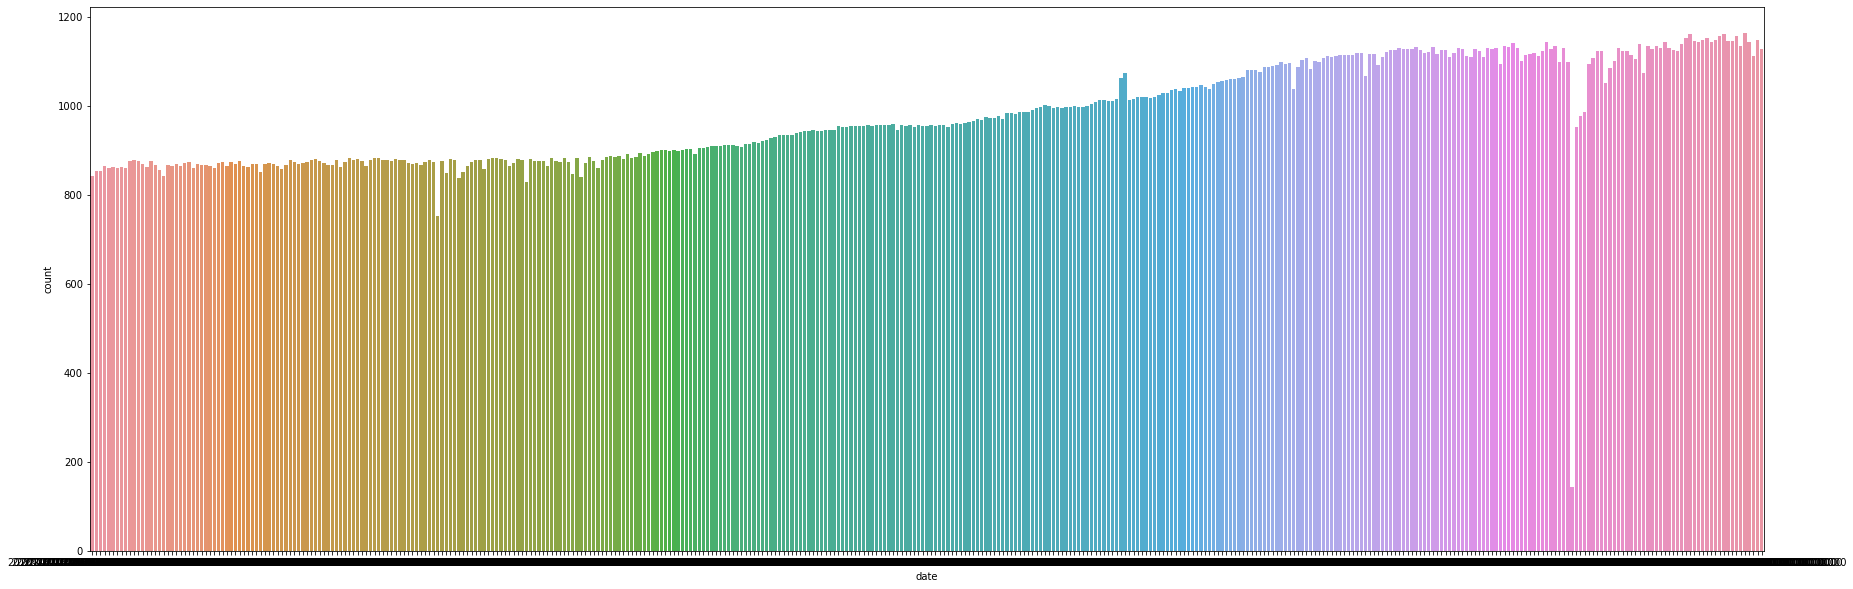

In [39]:
fig = plt.figure(figsize = (30,10))
sns.countplot(x=df["date"],data=df)
plt.show()


## we can say that the usage of citibikes have been increased over the period of 13 months i.e from 850trips per day from all station (i.e 1263 ) to 1100 trips per day from all station

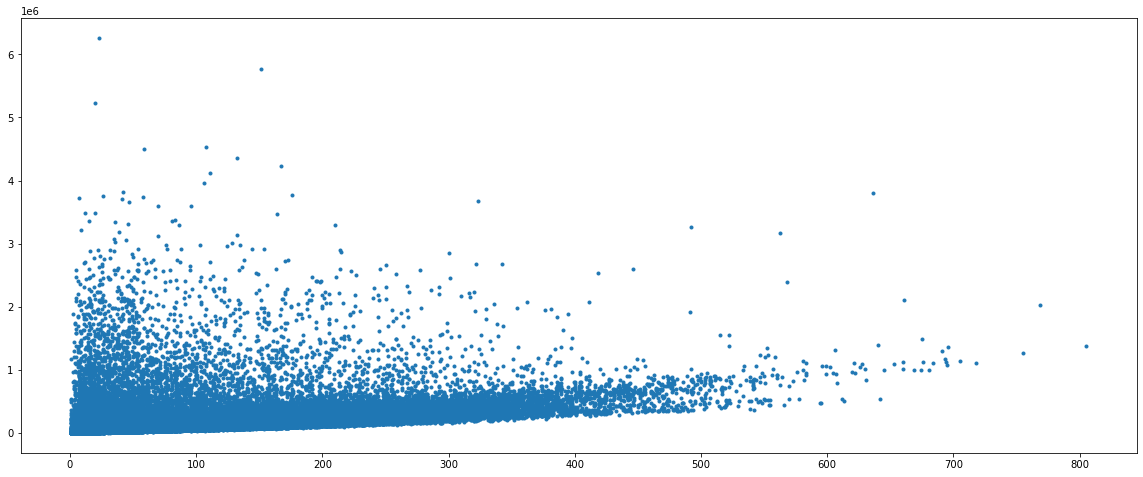

In [40]:
fig = plt.figure(figsize = (20, 8))
plt.scatter(df['total_count'],df['total_duration'],marker=".")
plt.show()

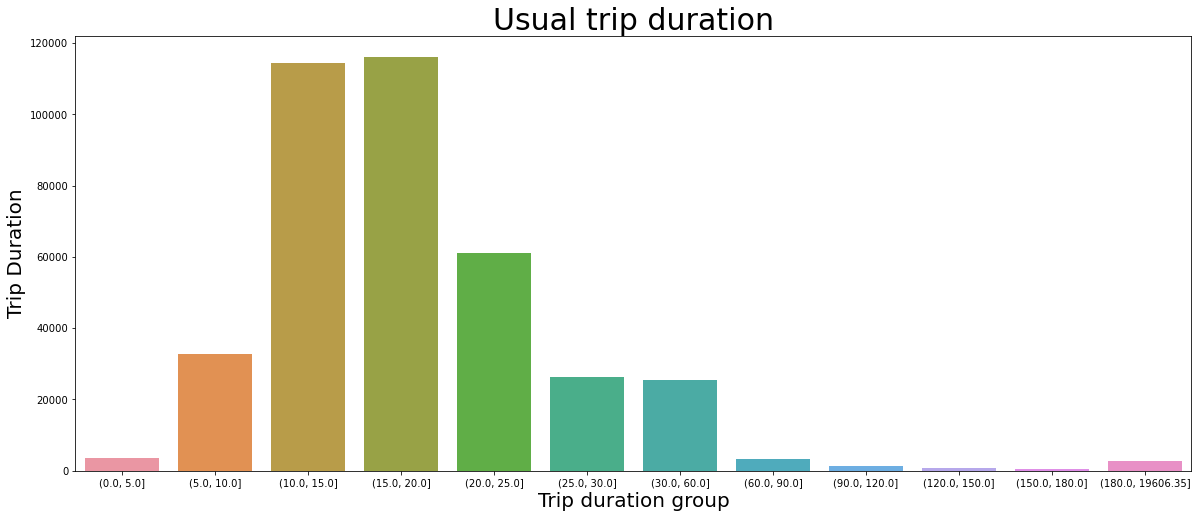

In [41]:
df['mean_duration'] = df['mean_duration']/(60)
max_limit = df['mean_duration'].max()

df['duration_bins'] = pd.cut(df['mean_duration'], [0,5,10,15,20,25,30,60,90,120,150,180, max_limit])

fig = plt.figure(figsize = (20, 8))
sns.barplot(x='duration_bins', y='mean_duration', data=df, estimator=np.size)
plt.title('Usual trip duration', fontsize=30)
plt.xlabel('Trip duration group', fontsize=20)
plt.ylabel('Trip Duration', fontsize=20)
plt.show()

## The majority of the people prefer citibikes for short trip time ie. between 10 mins to 20 mins

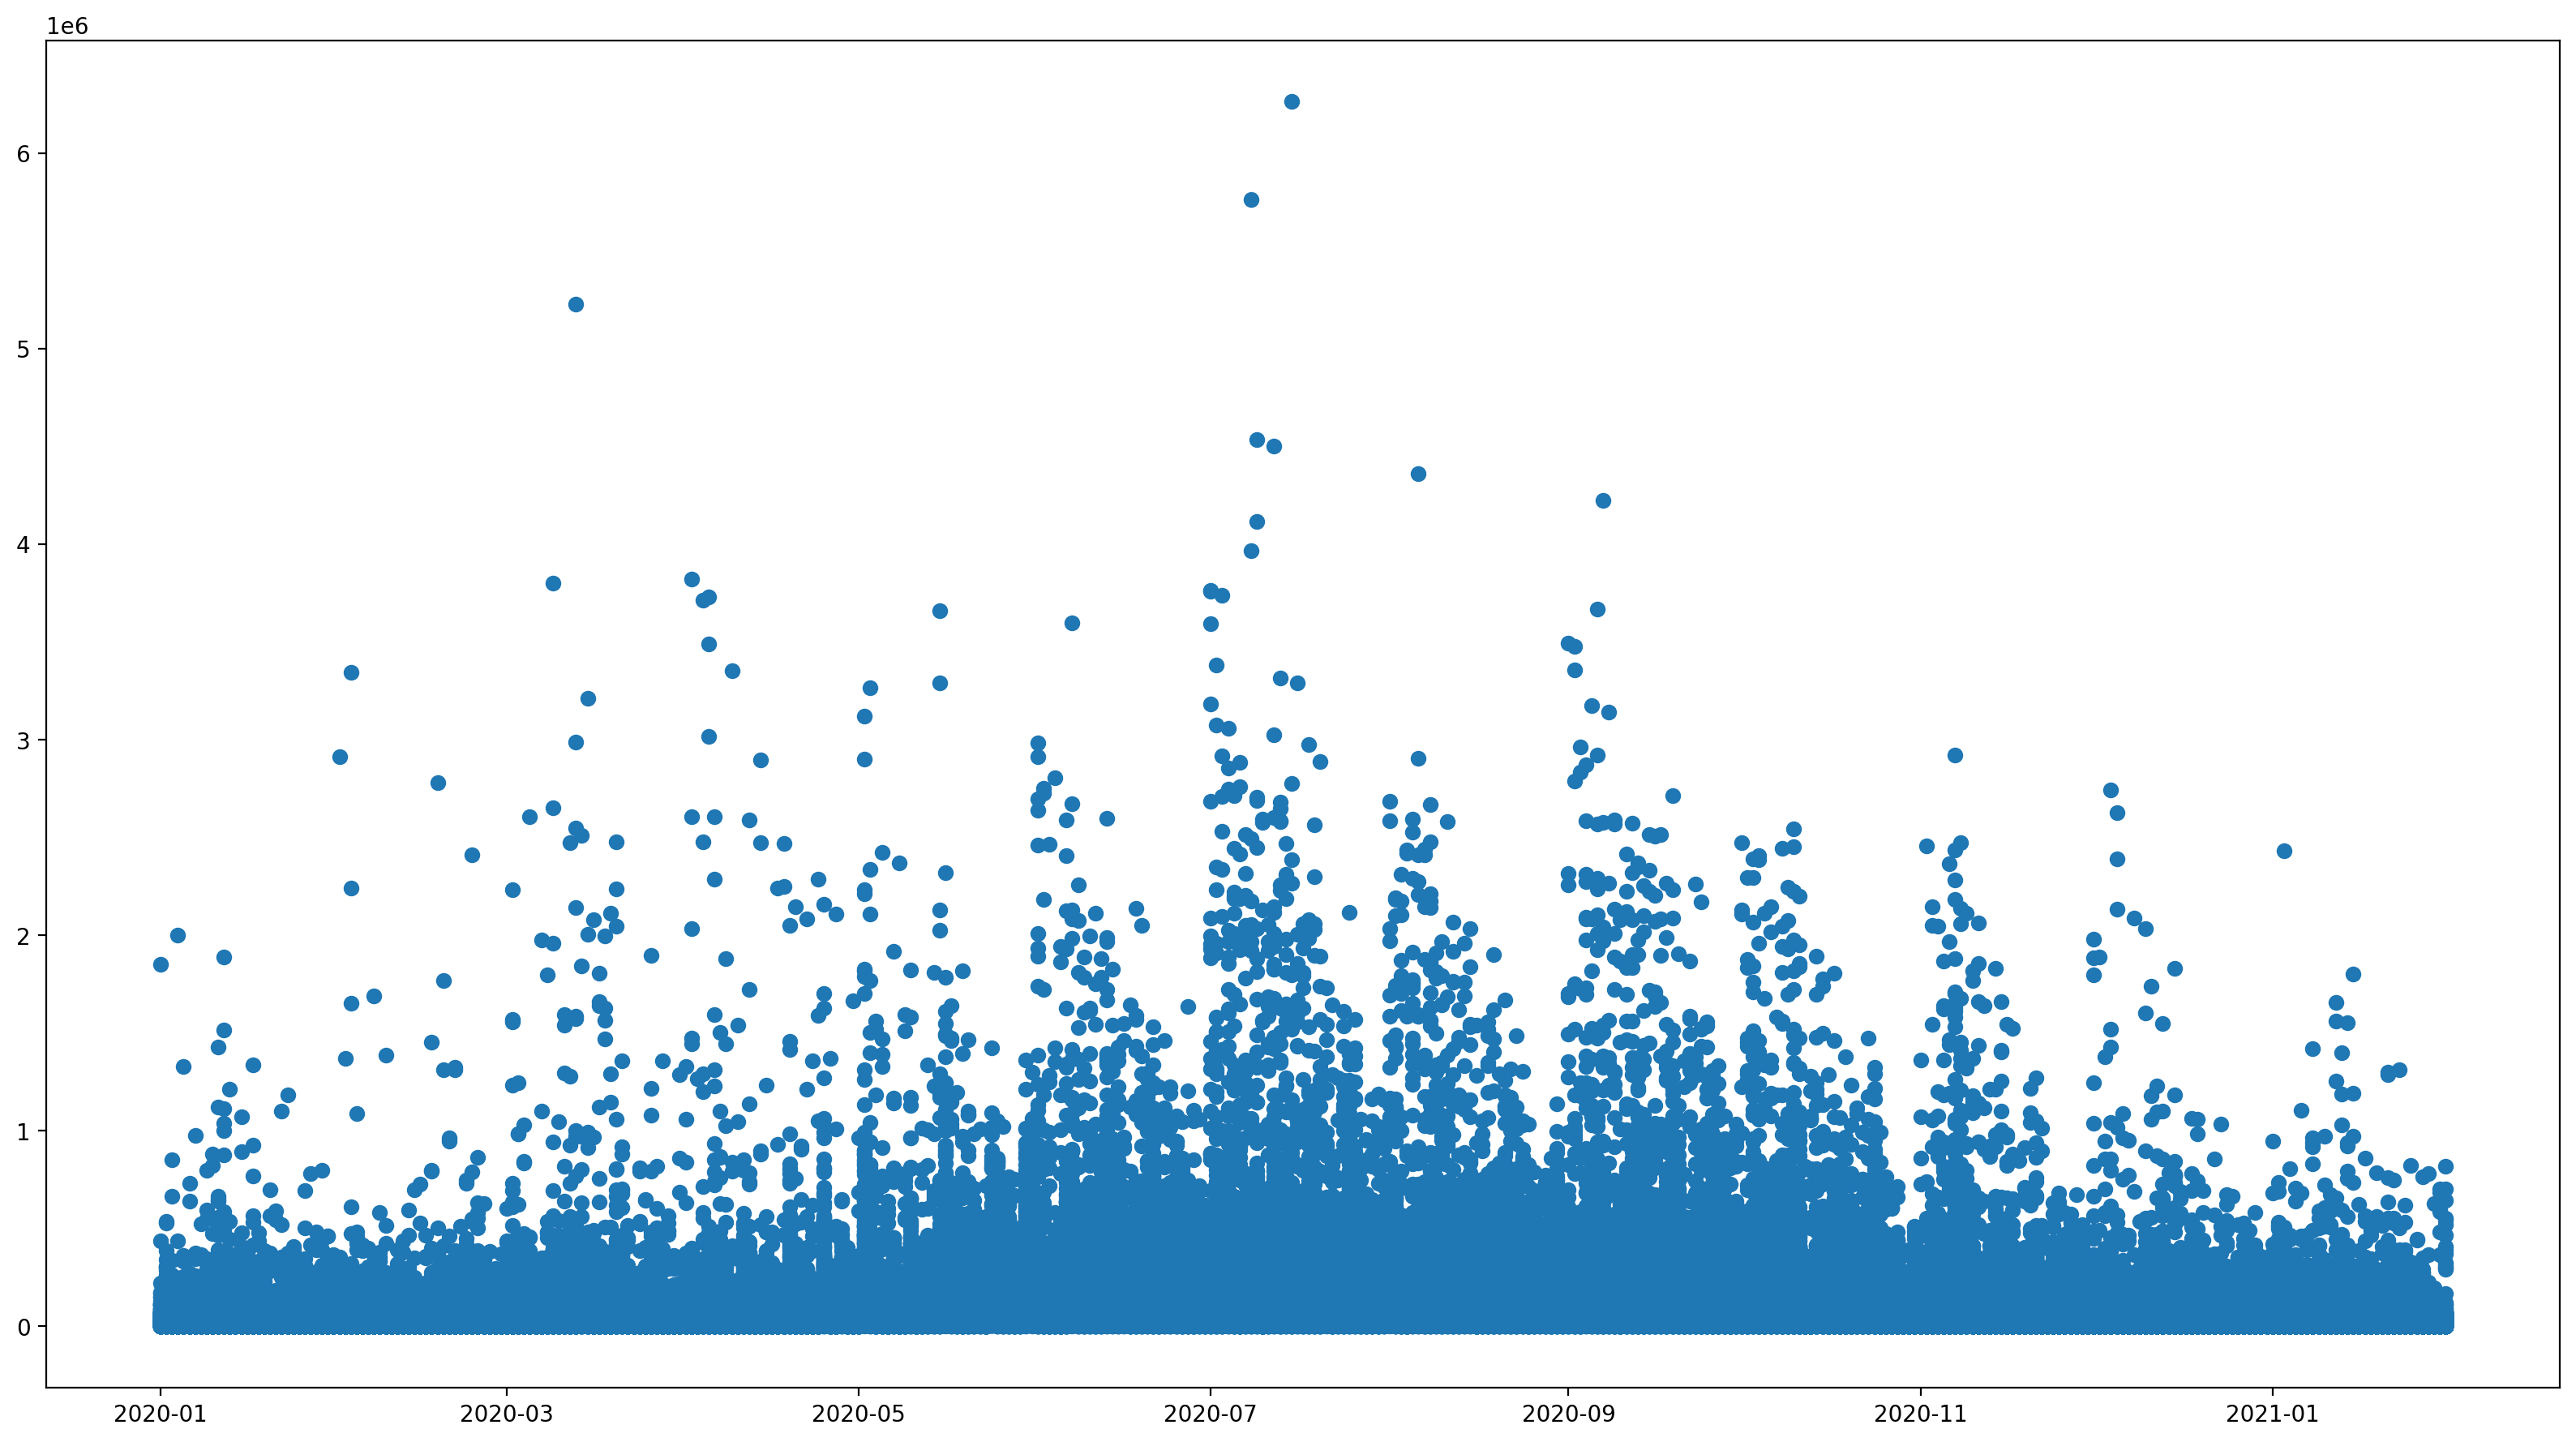

In [42]:
fig = plt.figure(figsize = (20, 11),dpi=200)
plt.scatter(df['date'], df['total_duration'])
plt.show()

## we can see that for months june , july , august , september , october we have trip for long duration 

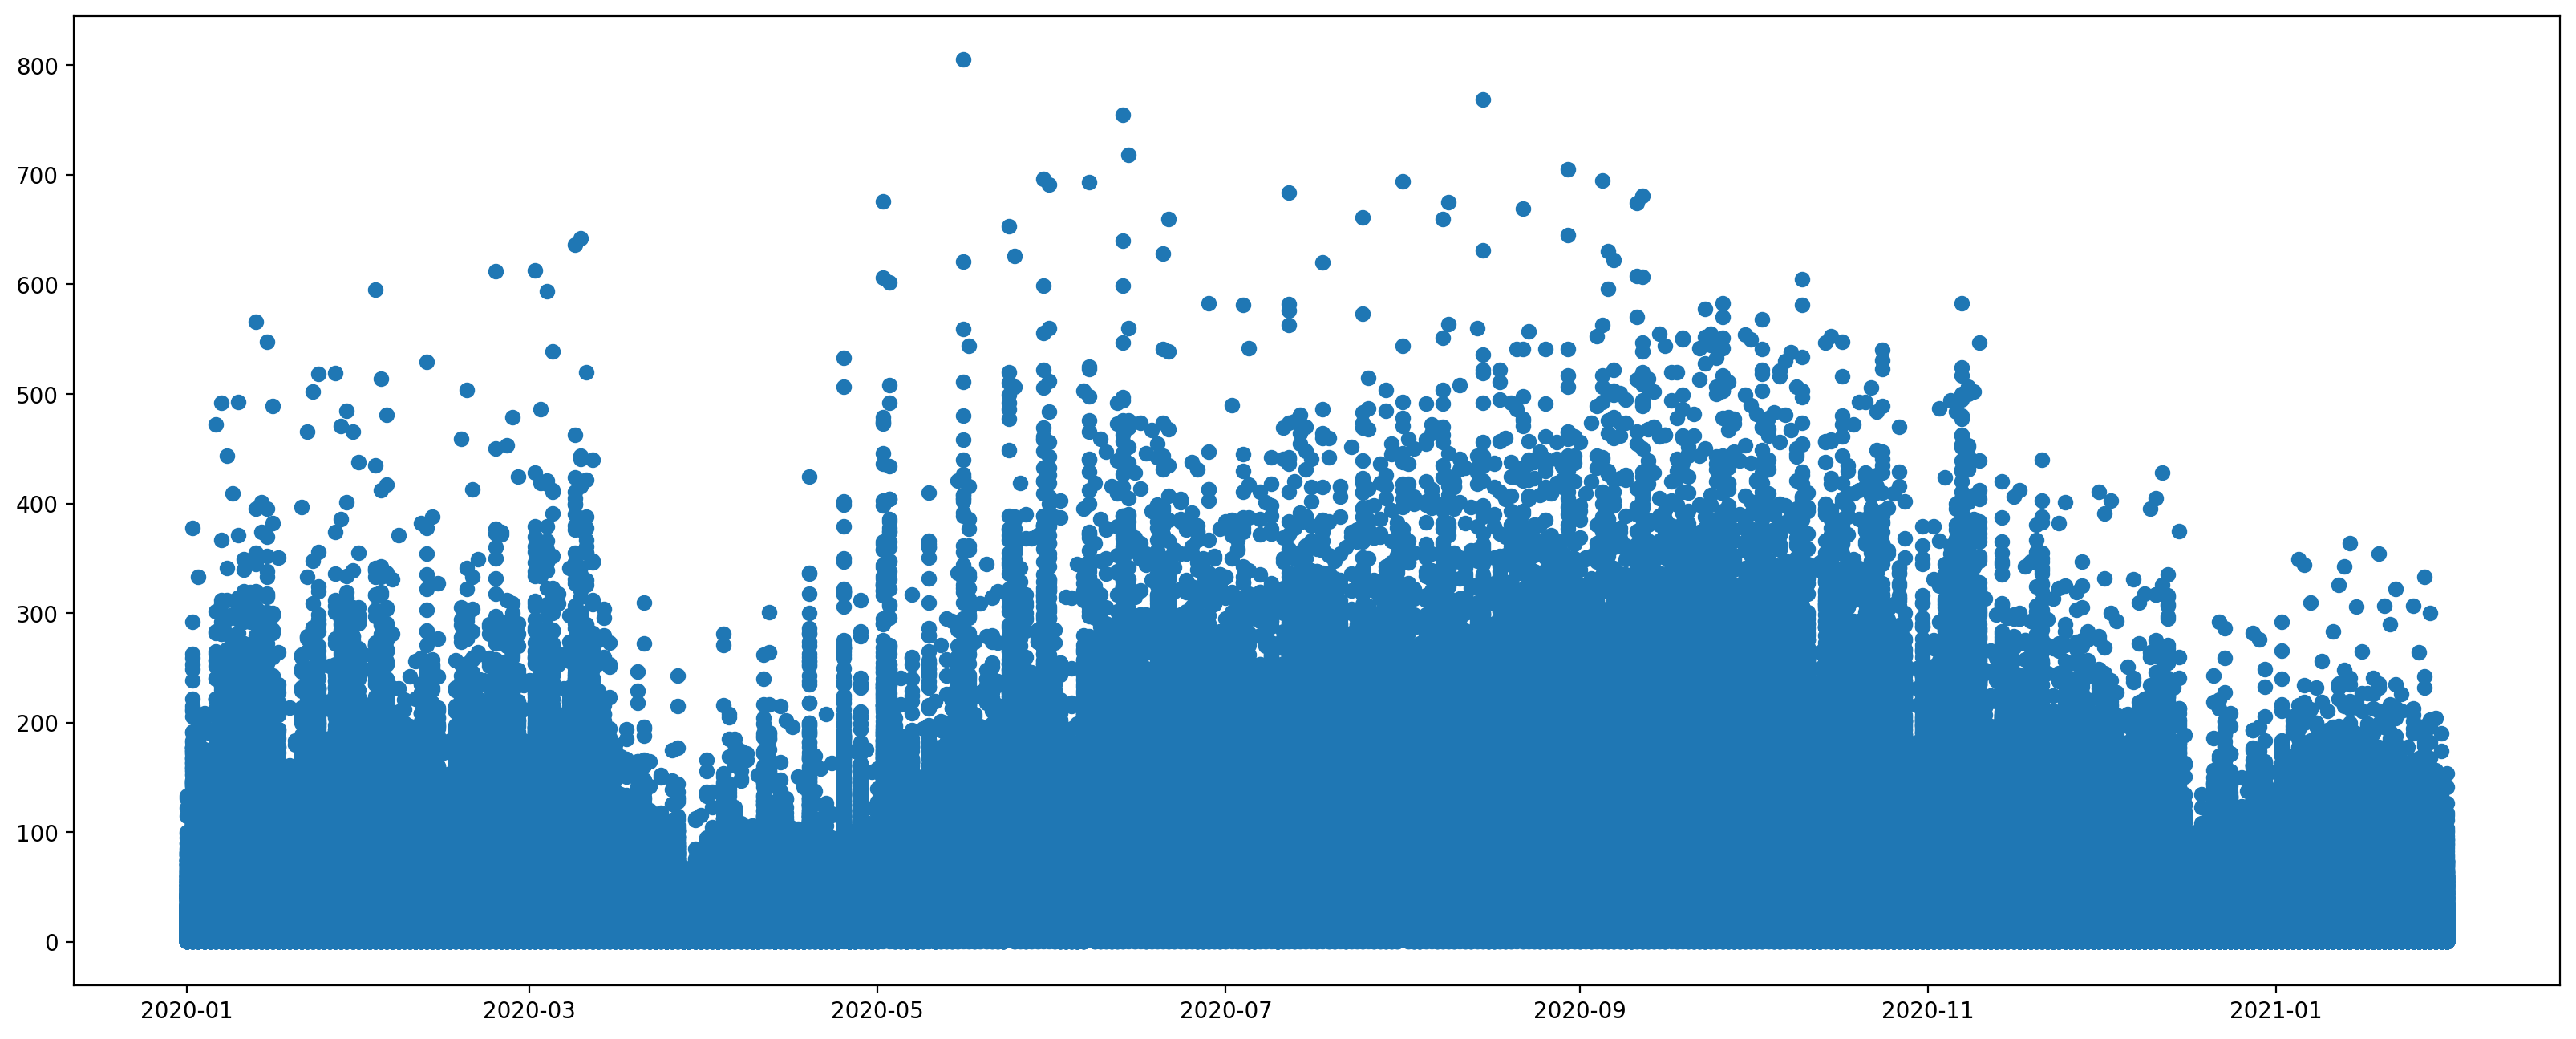

In [43]:
fig = plt.figure(figsize = (20,8),dpi=200)
plt.scatter(df['date'], df['total_count'])
plt.show()

## From the above graph we can interpret that usage of citibikes starts increasing from june till october and then again decreases. This can be because we have warm or normal climate during these months

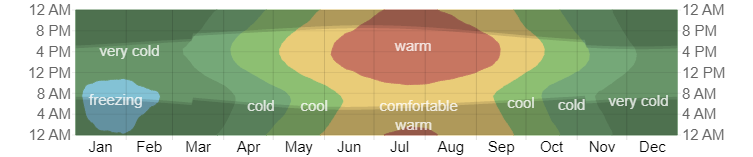

.

.

.

.

.

.

# Important Conclusion

## Baseline model is that the minimum no. of bike required at any station_id at any day is 54 bikes
## Citibike are mostly used at station_id ranging from 3000 to 4000 then secondly between 72 to 650 for almost everyday commute
## Usage of citibikes have been increased over the period of 13 months i.e from 850 trip on jan 2020 to 1100 trip on jan 2021
## The majority of the people prefer citibikes for short trip time ie. between 10 mins to 20 mins
## Usage of citibikes starts increasing from june till october and then again decreases. This can be because we have warm or normal climate during these months
## For months june , july , august , september , october we have trip for long duration

.

.

.

.

.

.

# Model Fitting

In [44]:
x = df.drop(["total_count","total_duration","mean_duration","duration_bins"],axis = 1)
y = df.total_count

In [45]:
x.head()

,station_id,date
0,72,2020-01-01
1,72,2020-01-02
2,72,2020-01-03
3,72,2020-01-04
4,72,2020-01-05


In [46]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388699 entries, 0 to 35286
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   station_id  388699 non-null  object        
 1   date        388699 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 8.9+ MB


In [47]:
#x.date = x.date.astype("str")

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388699 entries, 0 to 35286
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   station_id  388699 non-null  object        
 1   date        388699 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 8.9+ MB


In [49]:
import time

In [50]:
x['conv_date'] = pd.to_datetime(x.date, format="%Y-%M-%D")
x['conv_date'] = x['conv_date'].apply(lambda  var: time.mktime(var.timetuple()))

In [51]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388699 entries, 0 to 35286
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   station_id  388699 non-null  object        
 1   date        388699 non-null  datetime64[ns]
 2   conv_date   388699 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 11.9+ MB


In [52]:
x = x.drop(["date"],axis = 1)

In [53]:
x.head()

,station_id,conv_date
0,72,1.577817e+09
1,72,1.577903e+09
2,72,1.577990e+09
3,72,1.578076e+09
4,72,1.578163e+09


In [54]:
y.head()

0    39
1    96
2    74
3    51
4    51
Name: total_count, dtype: int64

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [57]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train) ### Training Data
x_test_scaled = scaler.transform(x_test)

In [58]:
model = LinearRegression()
model.fit(x_train_scaled,y_train)

train_pred = model.predict(x_train_scaled)
test_pred = model.predict(x_test_scaled)

In [59]:
def checkPerformance(y,ypred):
    r2 = r2_score(y,ypred)
    rmse = np.sqrt(mean_squared_error(y,ypred))
    print(f'R2 : {r2:.2f}\nRMSE : {rmse:.2f}')

In [60]:
checkPerformance(y_train,train_pred)

R2 : 0.18
RMSE : 55.34


In [61]:
checkPerformance(y_test,test_pred)

R2 : 0.19
RMSE : 54.85


In [62]:
cvs = cross_val_score(model,x_train_scaled,y_train,cv=10)

In [63]:
np.mean(cvs)

0.18265105799590953

# Model is under fitted

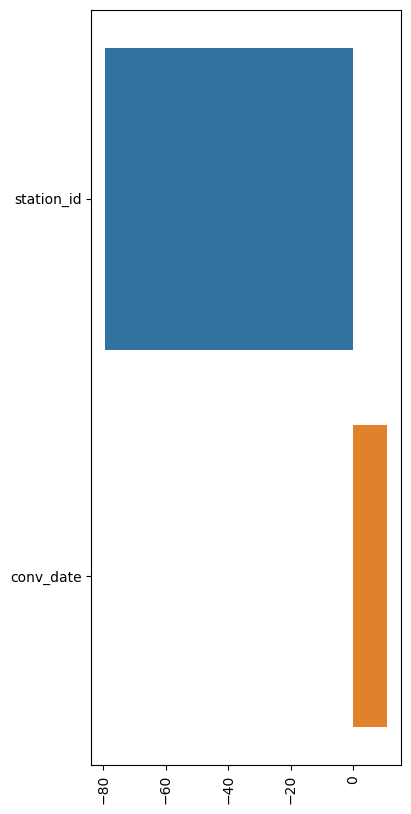

In [64]:
plt.figure(figsize=(4,10),dpi=100)
sns.barplot(y= x_train.columns, x= model.coef_)
plt.xticks(rotation= 90)
plt.show()